In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
scores = pd.read_csv('student_scores.csv')
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Shape of data: (25, 2)


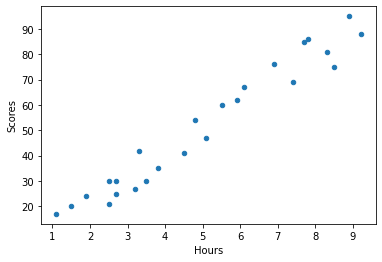

In [3]:
# Let's look at the shape of data to decide further steps
print('Shape of data:', scores.shape)
scores.plot(kind='scatter', x='Hours', y='Scores');

Data Preparation

In [4]:
# Separate the features and target. Use the below to get as 2-D vectors

X = scores.loc[:,:'Hours'].values
y = scores.loc[:,'Scores'].values

# Split the data into train and test sets. Going for a 75-25 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize the data before running the classifier

scaler = StandardScaler(with_mean=False)  # To normalize data similar to old behvaior of normalize=True
X_Train = scaler.fit_transform(X_train)
X_Test = scaler.transform(X_test)

In [5]:
# Initialize classifier and fit the model
linear = LinearRegression()     
linear.fit(X_Train, y_train)               

# Predict for training and test data
y_pred_train = linear.predict(X_Train)     
y_pred_test = linear.predict(X_Test)      

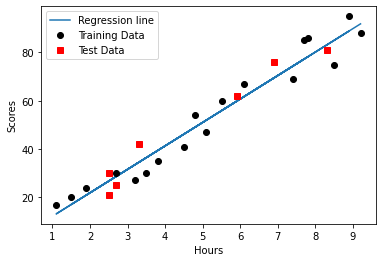

In [6]:
# Plot the regression line
plt.plot(X_train, y_pred_train, label='Regression line')
plt.plot(X_train, y_train,'ok', label='Training Data')
plt.plot(X_test, y_test,'sr', label='Test Data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [7]:
# Evaluation metrics

ind = ['Training', 'Test']
cols = ['MAE', 'MSE', 'RMSE']
coeff = linear.coef_
intercept = linear.intercept_

metrics = pd.DataFrame(index=ind, columns=cols)

metrics.loc['Training'] = [mean_absolute_error(y_train, y_pred_train), 
                           mean_squared_error(y_train, y_pred_train), 
                           np.sqrt(mean_squared_error(y_train, y_pred_train))]
metrics.loc['Test'] = [mean_absolute_error(y_test, y_pred_test),
                       mean_squared_error(y_test, y_pred_test), 
                       np.sqrt(mean_squared_error(y_test, y_pred_test))]

pd.options.display.float_format = '{:,.2f}'.format
metrics

,MAE,MSE,RMSE
Training,5.21,31.14,5.58
Test,4.43,23.52,4.85
